In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from EngbertMicrosaccadeToolbox import microsac_detection

In [2]:
# Set parameters
SAMPLING = 500
MINDUR = 3
VFAC = 5

In [3]:
# Read raw data (ASCII; subject 01, trial 005)
d = pd.read_csv("data/f01.005.dat", sep="\t", header=None, names=["t", "x_l", "y_l", "x_r", "y_r"])
d.head()
d = d.loc[3000:4499]
d.head()

,t,x_l,y_l,x_r,y_r
3000,6000.0,0.01188,0.60588,-0.21384,0.41976
3001,6002.0,0.02376,0.61380,-0.20988,0.41580
3002,6004.0,0.02772,0.62172,-0.19800,0.41976
3003,6006.0,0.03564,0.71280,-0.20196,0.41184
3004,6008.0,0.06336,0.64152,-0.20196,0.42372


In [4]:
right_eye = np.vstack([np.asarray(d.x_r), np.asarray(d.y_r)]).T
left_eye = np.vstack([np.asarray(d.x_l), np.asarray(d.y_l)]).T


In [6]:
ms_r, rad_r = microsac_detection.microsacc(right_eye)
ms_l, rad_l = microsac_detection.microsacc(left_eye)

In [7]:
bino, monol, monor = microsac_detection.binsacc(ms_r, ms_l)

In [8]:
bino = pd.DataFrame(bino, columns=["onset_l", "end_l", "peakvelocity_l", "horizontalcomponent_l", "verticalcomponent_l","horizontalamplitude_l", "verticalamplitude_l", "onset_r", "end_r", "peakvelocity_r", "horizontalcomponent_r", "verticalcomponent_r","horizontalamplitude_r", "verticalamplitude_r"])

In [9]:
d = d.reset_index(drop=True).reset_index(names=["t_real"])
d

,t_real,t,x_l,y_l,x_r,y_r
0,0,6000.0,0.01188,0.60588,-0.21384,0.41976
1,1,6002.0,0.02376,0.61380,-0.20988,0.41580
2,2,6004.0,0.02772,0.62172,-0.19800,0.41976
3,3,6006.0,0.03564,0.71280,-0.20196,0.41184
4,4,6008.0,0.06336,0.64152,-0.20196,0.42372
...,...,...,...,...,...,...
1495,1495,8990.0,-0.05148,0.28512,-0.07920,-0.05148
1496,1496,8992.0,-0.04752,0.28908,-0.06336,-0.04356
1497,1497,8994.0,-0.07524,0.29700,-0.07524,-0.04752
1498,1498,8996.0,-0.05544,0.29700,-0.08316,-0.03960


In [10]:
a = microsac_detection.smoothdata(right_eye)
d["xrs"],d["yrs"] = a[:,0], a[:,1]
a = microsac_detection.smoothdata(left_eye)
d["xls"],d["yls"] = a[:,0], a[:,1]


In [31]:
d["sac"] = 0
for idx, row in bino.iterrows():
  d.loc[(d["t_real"]>=row["onset_l"]) & (d["t_real"]<=row["end_l"]), "sac"] = 1

Text(0.5, 1.0, 'Right Eye')

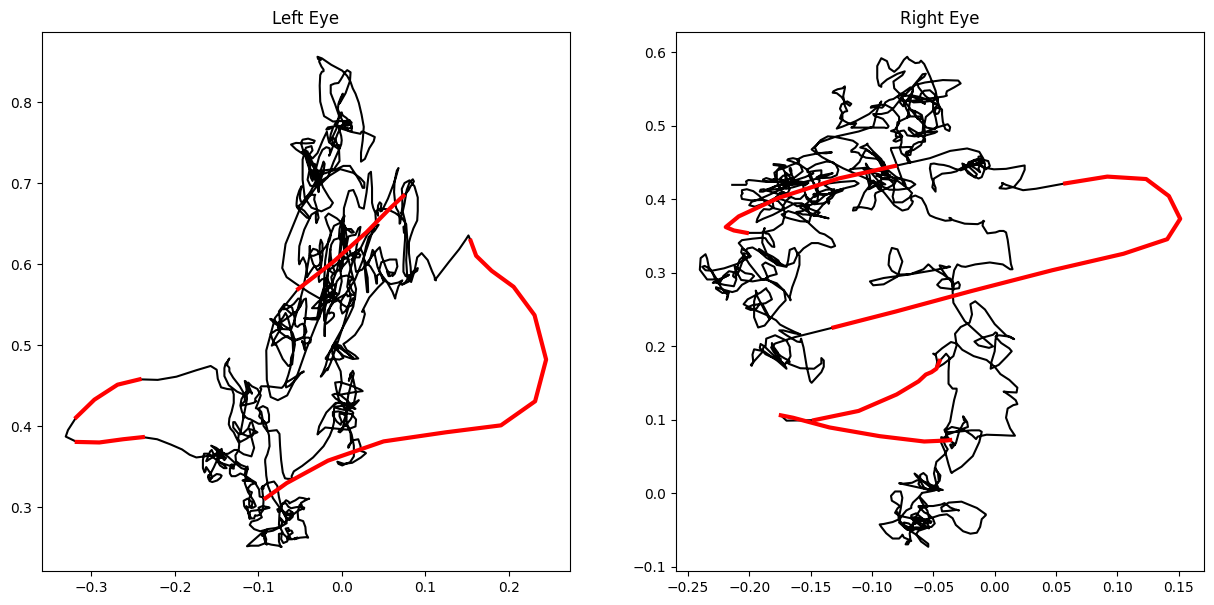

In [36]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].plot(d.xls, d.yls, c="black")
for idx, row in bino.iterrows():
  temp = d.loc[(d["t_real"]>=row["onset_l"]) & (d["t_real"]<=row["end_l"])]
  ax[0].plot(temp.xls, temp.yls, c="red", linewidth=3)
ax[0].set_title("Left Eye")
  
ax[1].plot(d.xrs, d.yrs, c="black")
for idx, row in bino.iterrows():
  temp = d.loc[(d["t_real"]>=row["onset_r"]) & (d["t_real"]<=row["end_r"])]
  ax[1].plot(temp.xrs, temp.yrs, c="red", linewidth=3)
ax[1].set_title("Right Eye")

In [17]:
a = microsac_detection.vecvel(left_eye, 500)
d["v_xl"],d["v_yl"] = a[:,0], a[:,1]

In [18]:
phi = np.linspace(0,2*np.pi, 300)
cx = rad_l[0]*np.cos(phi)
cy = rad_l[1]*np.sin(phi)
#lines(cx,cy,lty=2)

Text(0.5, 1.0, 'Velocity')

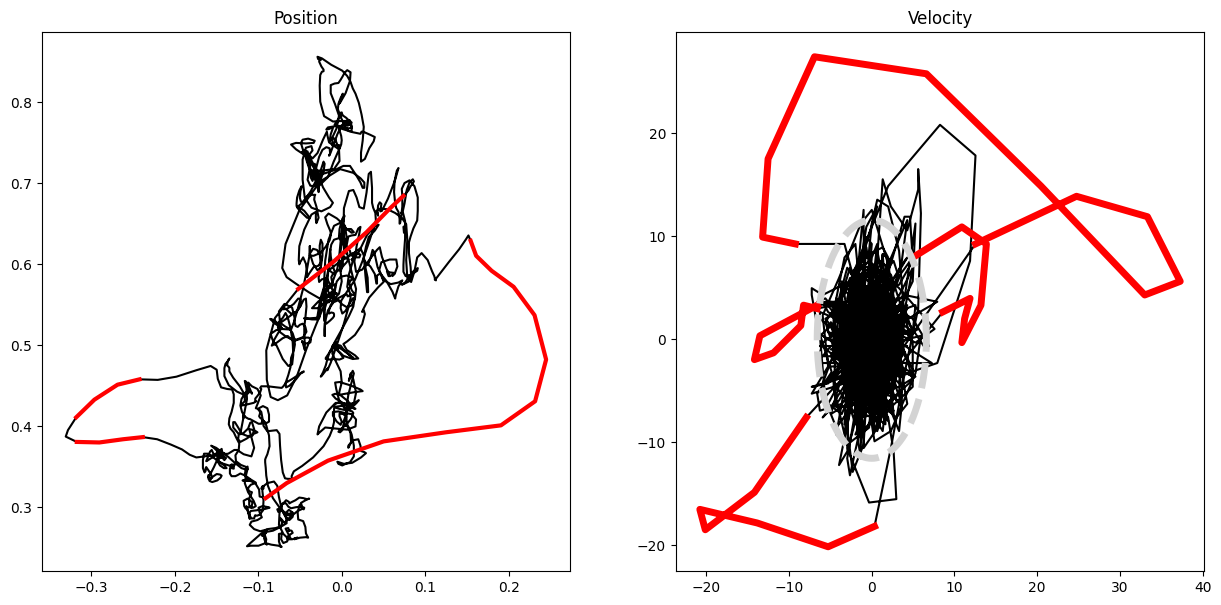

In [35]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].plot(d.xls, d.yls, c="black")
for idx, row in bino.iterrows():
  temp = d.loc[(d["t_real"]>=row["onset_l"]) & (d["t_real"]<=row["end_l"])]
  ax[0].plot(temp.xls, temp.yls, c="red", linewidth=3)
ax[0].set_title("Position")
  
ax[1].plot(d.v_xl, d.v_yl, c="black")
for idx, row in bino.iterrows():
  temp = d.loc[(d["t_real"]>=row["onset_r"]) & (d["t_real"]<=row["end_r"])]
  ax[1].plot(temp.v_xl, temp.v_yl, c="red", linewidth=5)
  
ax[1].plot(cx, cy, c="lightgrey", linestyle="dashed", linewidth=5)
ax[1].set_title("Velocity")

In [32]:
msd = np.sqrt(np.median((bb-np.median(bb, axis=0))**2, axis=0))

In [33]:
radius = VFAC * msd

In [37]:
test = ((bb/radius)**2).sum(axis=1)
test

array([0.        , 0.2304    , 0.04      , ..., 0.11111111, 0.3744    ,
       0.        ])

In [47]:
np.where(test>1)[0].shape

(41,)

In [34]:
radius

array([8.25, 9.9 ])

In [13]:
w = np.array([[1,2,3], [1,2,3]]).T
w.cumsum(axis=0)

array([[1, 1],
       [3, 3],
       [6, 6]])

In [68]:
aa[0:10]

array([[-0.21384,  0.41976],
       [-0.20988,  0.4158 ],
       [-0.198  ,  0.41976],
       [-0.20196,  0.41184],
       [-0.20196,  0.42372],
       [-0.20196,  0.42372],
       [-0.20196,  0.42372],
       [-0.19008,  0.42372],
       [-0.18612,  0.41976],
       [-0.15444,  0.4158 ]])

In [109]:
def vecvel(x, sampling):
  N, _ = x.shape
  v = np.zeros((N, 2))
  print(v.shape)
  v[2:(N-2),] = SAMPLING/6*(x[4:N,] + x[3:(N-1),] - x[1:(N-3),] - x[0:(N-4),])
  v[1,] = SAMPLING/2*(x[2,] - x[0,])
  v[(N-2),] = SAMPLING/2*(x[N-1,] - x[(N-3),])  
  return v
  

In [110]:
N, _ = aa.shape
aa[4:N-1,].shape
aa[3:N-2,].shape
aa[1:(N-4),].shape
aa[0:(N-5),].shape

(1495, 2)

In [111]:
aa[N-1,1]

-0.02376

In [112]:
aa[4:N-1,]

array([[-0.20196,  0.42372],
       [-0.20196,  0.42372],
       [-0.20196,  0.42372],
       ...,
       [-0.06336, -0.04356],
       [-0.07524, -0.04752],
       [-0.08316, -0.0396 ]])

In [113]:
aa = np.array([[1,2,3,4, 5, 6],[1,2,3,4,5, 6]]).T
aa.shape

(6, 2)